# COMP 432 PROJECT: Predicting the Colors of Squirrels of Central Park
By Vanessa Razon
<br/>Student ID: 40033699

In [55]:
# LOAD PACKAGES AND DATA
import pandas as pd                   
import numpy as np                    
import sklearn                        
import sklearn.linear_model   # For LogisticRegression        
import sklearn.model_selection # For cross-validation
import sklearn.metrics  # For accuracy_score
import sklearn.neural_network # For MLPClassifier
import sklearn.svm  # For SVC class 
import sklearn.ensemble
import sklearn.tree
import random
import matplotlib.pyplot as plt

### Preprocessing the dataset

In [2]:
# Load the dataset
df = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
df.shape # We see that there are currently 3023 data points and 31 columns

# Checking for any missing values in the features/labels that will be used in the project
# Features
print("Number of missing values:")
print("X coordinate: %i"%(df.shape[0]-df['X'].count()))
print("Y coordinate: %i"%(df.shape[0]-df['X'].count()))
print("Time of day: %i"%(df.shape[0]-df['Shift'].count()))
print("Date: %i"%(df.shape[0]-df['Date'].count()))
# Labels (note: since squirrels do not always have a highlight fur color, it is ok to have missing values for
# the highlight color)
print("Primary fur color: %i"%(df.shape[0]-df['Primary Fur Color'].count())) 

# Remove data points with missing values of primary fur color
df = df.dropna(subset=['Primary Fur Color'])
# Set missing highlight fur colors as 'None'
df['Highlight Fur Color'] = df['Highlight Fur Color'].fillna('None')
df.reset_index(drop=True, inplace=True)

Number of missing values:
X coordinate: 0
Y coordinate: 0
Time of day: 0
Date: 0
Primary fur color: 55


In [3]:
# Converting the features/labels into numpy arrays

Xcoor = np.array(df['X'])
Ycoor = np.array(df['Y'])
# Time of day: value 0 if shift=AM or 1 if shift=PM
time = np.array([0 if df['Shift'][i]=='AM' else 1 for i in range(df.shape[0])])
# Date: since the data was collected in the span of 2 weeks of October 2018, only the date 
# number will be used for the 'Date' feature
date = np.array([str(df['Date'][i])[2]+str(df['Date'][i])[3] for i in range(df.shape[0])], dtype='int32')

# Since the labels are expressed as categorical variables, categorical encoding will be done 
from sklearn import preprocessing

primary_LE = preprocessing.LabelEncoder()
pColor = primary_LE.fit_transform(df['Primary Fur Color'])

highlight_LE = preprocessing.LabelEncoder()
hColor = highlight_LE.fit_transform(df['Highlight Fur Color'])

labels = [pColor,hColor]

### Multiclass Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression


def multiClassLR_train(predictors,labels):
    """ Trains a multiclass logistic regression and performs k-fold cross-validation. 
    Expected output is a multiclass logistic regression model that has been trained using the given predictors and
    labels.
    
    Arguments
    ---------
    predictors: matrix(n_samples,n_features) of predictors to be used in the model
    labels: vector of squirrel's color (1x2 vector of Strings)
    
    Example
    -------
    pred = multiClassLR()
    pred
    >>> 
    """
    model = LogisticRegression(multi_class='multinomial', 
                               max_iter=300, solver='newton-cg', random_state=0).fit(predictors,labels)
    return model


def multiClassLR_pred(X, Y, time, date,model):
    """ Predicts squirrel's primary and highlight color(s) multiclass logistic regression. 
        Expected output is a 2x1 vector containing the predicted main and highlight colors
    
    Arguments
    ---------
    params: description w/ types
    X: X coordinate (float)
    Y: Y coordinate (float)
    time: time of squirrel sighting (int)
    date: date number of squirrel sighting (int)
    label: vector of squirrel's color (1x2 vector of Strings)
    model: multiclass logistic regression model object
    
    Example
    -------
    pred = multiClassLR(-47.82712310, 0.3123123, 0, 12)
    pred
    >>> [0,2]
    """
    modelInput = np.array([X,Y,time,date]).reshape(X.size,-1)
    return model.predict(modelInput)
    

### Multilayer Perceptron

In [50]:
# MLP FCT
from sklearn.neural_network import MLPClassifier

def MLP_train(predictors,labels):
    """ Trains a multilayer perceptron and performs k-fold cross-validation. 
    Expected output is a MLP model that has been trained using the given predictors and
    labels.
    
    Arguments
    ---------
    predictors: matrix(n_samples,n_features) of predictors to be used in the model
    labels: vector of squirrel's color (1x2 vector of Strings)
    
    Example
    -------
    
    >>> 
    """
    model = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', batch_size=20, max_iter=300,
                          learning_rate_init=0.05, random_state=0).fit(predictors,labels)
#     kFoldCV(model,predictors,labels, 50)
    return model

def MLP_pred(X, Y, time, date,model):
    modelInput = np.array([X,Y,time,date]).reshape(X.size,-1)
    return model.predict(modelInput)


### Support Vector Machine

In [6]:
# SVM FCT
from sklearn.svm import SVC

def SVM(predictors,labels):
    model = SVC(kernel='rbf', degree=2, gamma=1).fit(predictors, labels)
    return model

def SVM_pred(X, Y, time, date,model):
    modelInput = np.array([X,Y,time,date]).reshape(X.size,-1)
    return model.predict(modelInput)

In [7]:
# DECISION TREE FCT

In [8]:
# Other useful functions

# def pred(predictors, model, labels, numDisp):
#     """Makes predictions on given predictors with model. Displays certain predictions and calculates 
#     test accuracy of model
    
#     Arguments
#     ---------
#     predictors: matrix (n_samples, n_features) of predictors 
#     labels: vector (n_samples, ) containing labels of corresponding predictors
#     model: model to make predictions
#     numDisp: number of predictions to display
    
#     Example
#     -------
#     >>>
#     >>>
#     """
#     sample = random.sample(range(predictors.shape[0]),numDisp)
#     pred_vals = np.empty(numDisp)
    
#     for i in range(numDisp):
#         pred_vals[i] = model.predict(predictors[i])
        
#     print("Some predictions: ")
#     for i in sample:
#         color = model.predict(predictors[i])
#     if type(model) == sklearn.linear_model._logistic.LogisticRegression:
        
#     print("Model's accuracy: %.3f%%"%sklearn.metrics.accuracy_score(labels, pred)*100)
#     pass


def color(colorVector):
    """ Transforms labels for primary and highlight color into original color names. The expected output is a 1d 
        array that holds the primary and highlight colors (Strings) 
    
    Arguments
    ---------
    vector: 1x2 array that holds integer values to be translated as colors
    
    Example
    -------
    >>>vector = np.array([1,10])
    >>>color(vector)
    ['Cinnamon', 'White']
    """
    return np.append(primary_LE.inverse_transform(colorVector[0]), highlight_LE.inverse_transform(colorVector[1]))


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def kFoldCV(model, X_train, y_train,folds=10):
    """ Performs k-fold cross-validation and prints held-out accuracy
    
    Arguments
    ---------
    model: 
    X_train:
    y_train:
    
    Example
    -------
    
    """
    for i in np.arange(10,folds-10,10):
        scores = cross_val_score(model, X_train, y_train, cv=i, scoring='accuracy')
        print("held-out accuracy (%d-fold): %.5f%%"%(i,scores.mean()*100))

### Running all the machine learning models

In [13]:
type(pColor_MLR) == LogisticRegression

NameError: name 'pColor_MLR' is not defined

In [53]:
from sklearn.model_selection import train_test_split
modelInput = np.array([Xcoor,Ycoor,time,date]).reshape(Xcoor.size,-1)
X_train, X_test, y_train, y_test = train_test_split(modelInput,pColor, test_size=0.35, random_state=0) # For training

print("MLR")
# Multiclass Logistic Regression
pColor_MLR = multiClassLR_train(X_train, y_train)
# hColor_MLR = multiClassLR_train(modelInput,labels[1])
pColor_MLR_split = multiClassLR_train(X_train, y_train)
kFoldCV(pColor_MLR, X_test, y_test,40)

print("MLP")
# Multi-layer perceptron
pColor_MLP = MLP_train(X_train, y_train)
pColor_MLP_split = MLP_train(X_train, y_train)
# hColor_MLP = MLP_train(modelInput,labels[1])
kFoldCV(pColor_MLP, X_test, y_test,40)

print("SVM")
# Support-vector machine
pColor_SVM = SVM(X_train, y_train)
pColor_SVM_split = SVM(X_train, y_train)
# hColor_SVM = SVM(modelInput,labels[1])
kFoldCV(pColor_SVM, X_test, y_test,40)


# Decision tree


MLR
held-out accuracy (10-fold): 81.71303%
held-out accuracy (20-fold): 81.71380%
MLP
held-out accuracy (10-fold): 80.06255%
held-out accuracy (20-fold): 79.11765%
SVM
held-out accuracy (10-fold): 81.71303%
held-out accuracy (20-fold): 81.71380%


In [54]:
from sklearn.metrics import accuracy_score

pred_MLR = pColor_MLR_split.predict(X_test)
print(accuracy_score(y_test, pred_MLR))

pred_MLP = pColor_MLP_split.predict(X_test)
print(accuracy_score(y_test, pred_MLP))

pred_SVM = pColor_SVM_split.predict(X_test)
print(accuracy_score(y_test, pred_SVM))

0.8171318575553417
0.8171318575553417
0.8161693936477382


In [15]:
######### TEST CELL #########

inputX = np.array([Xcoor, Ycoor, time, date]).reshape(Xcoor.size,-1)

# pred_pcolor = multiClassLR_pred(Xcoor[418], Ycoor[827], time[50], date[2],pColor_MLR)
# pred_hcolor = multiClassLR_pred(Xcoor[418], Ycoor[87], time[5], date[3],hColor_MLR)
# pred_pcolor2 = multiClassLR_pred(Xcoor[418], Ycoor[827], time[50], date[2],pColor_MLP)
# pred_hcolor2 = multiClassLR_pred(Xcoor[418], Ycoor[87], time[5], date[3],hColor_MLP)
pred_pcolor = SVM_pred(Xcoor[418], Ycoor[87], time[5], date[3],pColor_SVM)
pred_hcolor2 = SVM_pred(Xcoor[418], Ycoor[87], time[5], date[3],hColor_SVM)

print(color(np.array([pred_pcolor,pred_hcolor2])))
# print(color(np.array([pred_pcolor2,pred_hcolor2])))

['Gray' 'None']


In [19]:
# POSSIBLE MODELS TO CONSIDER: 
    # k-Nearest Neighbors.
    # Decision Trees.
    # Random Forest.
# Maybe try clustering squirrels into areas of the park instead of using coordinates? 

scaler = sklearn.preprocessing.StandardScaler()
coor_scaled = scaler.fit_transform(coor)
modelInput = np.array([coor_scaled[:,0],coor_scaled[:,1],time,date]).reshape(Xcoor.size,-1)
pColor_MLP = MLP_train(modelInput,labels[0])
hColor_MLP = MLP_train(modelInput,labels[1])
# kFoldCV(pColor_MLR, modelInput, labels[0],50)

for i in range(1000):
    pred_pcolor = MLP_pred(coor_scaled[i,0], coor_scaled[i,1], time[i], date[i],pColor_MLP)
    pred_hcolor = MLP_pred(coor_scaled[i,0], coor_scaled[i,1], time[i], date[i],hColor_MLP)

    print(color(np.array([pred_pcolor,pred_hcolor])))
#     print(df["Primary Fur Color"].iloc(i))

['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnam

['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Gray' 'None']
['Cinnamon' 'Non

In [ ]:
pColor_SVM = SVM()

### Another approach
plotting the figures

Text(0.5, 1.0, "Squirrels' highlight color")

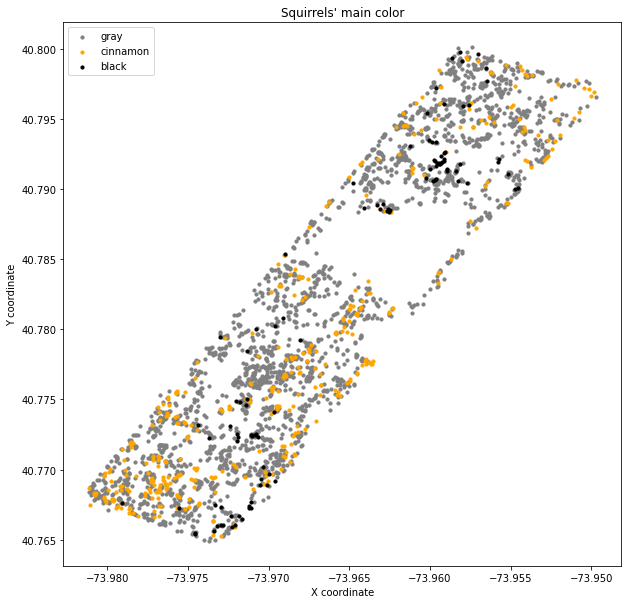

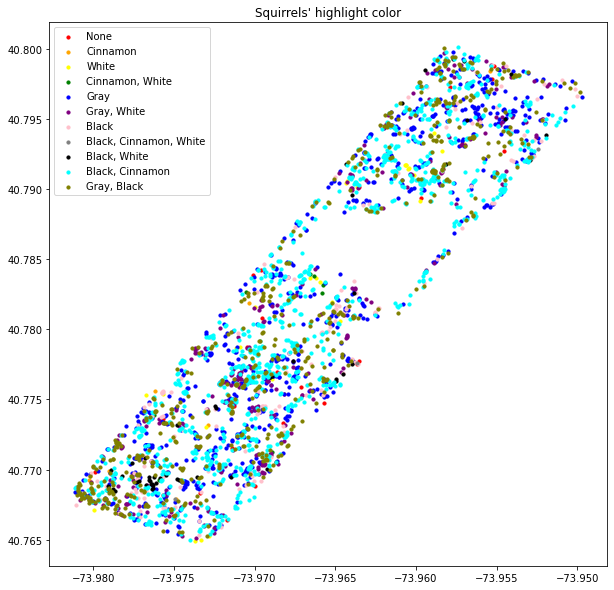

In [17]:
plt.figure(figsize=(10,10))
coor = np.vstack((Xcoor,Ycoor)).T
plt.scatter(*coor[pColor==2].T, c="gray", s=10, label="gray")
plt.scatter(*coor[pColor==1].T, c="orange", s=10, label="cinnamon")
plt.scatter(*coor[pColor==0].T, c="black", s=10, label="black")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Squirrels' main color")
plt.legend()

plt.figure(figsize=(10,10))
colorList=["red", "orange", "yellow", "green", "blue", "purple", "pink", "gray", "black", "cyan", "olive"]
colorLabels = df['Highlight Fur Color'].value_counts().index.tolist()

for i in range(df["Highlight Fur Color"].nunique()):
    plt.scatter(*coor[hColor==i].T, c=colorList[i], s=10, label=colorLabels[i])
plt.legend()
plt.title("Squirrels' highlight color")